# <span style="display: flex; justify-content: center; text-decoration: underline overline; text-decoration-style: solid; text-decoration-color: #732626; color: #000080;">Predication of Voluntary Quit Employment</span>

<a href="https://www.linkedin.com/in/okinoleiba" style="display: flex; justify-content: center;">Okino Kamali Leiba</a>

<span style="display: flex; justify-content: center;">![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)</span>

In [126]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib as mpl
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error


## <span style="padding-left: 650px; text-decoration: underline overline; text-decoration-style: double; text-decoration-color: #732626; color: #000080;">Exploratory Data Analysis</span>
<span style="display: flex; justify-content: center;">![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)</span>

In [127]:
filepath = "C:/Users/Owner/source/vsc_repo/machine_learn_cookbook/Logistic_Regression_Quit-Predict/hr_file.csv"
hr_data = pd.read_csv(filepath, delimiter=",", header=0, engine="python", encoding="utf-8", on_bad_lines="warn")
hr_data.rename(str.title, axis='columns', inplace=True)
hr_data['Departments '] = [s.title() for s in hr_data['Departments ']]
hr_data['Salary'] = [s.title() for s in hr_data['Salary']]
hr_data['Departments '] = hr_data['Departments '].replace(["Hr","and", "It","Mng", "R&d"], ["HR","&","IT","MNG","R&D"], regex=True, inplace=False)
hr_data.head(5)


,Satisfaction Level,Last Evaluation,Number Of Projects,Monthly Hours,Total Time At The Company,Work Accidents,Quit The Company,Promoted In Last 5 Yrs,Departments,Salary,Management
0,0.38,0.53,2,157,3,0,1,0,Sales,Low,31
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium,71
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium,8
3,0.72,0.87,5,223,5,0,1,0,Sales,Low,68
4,0.37,0.52,2,159,3,0,1,0,Sales,Low,48


In [128]:
hr_data.tail(5)

,Satisfaction Level,Last Evaluation,Number Of Projects,Monthly Hours,Total Time At The Company,Work Accidents,Quit The Company,Promoted In Last 5 Yrs,Departments,Salary,Management
14994,0.40,0.57,2,151,3,0,1,0,Support,Low,49
14995,0.37,0.48,2,160,3,0,1,0,Support,Low,3
14996,0.37,0.53,2,143,3,0,1,0,Support,Low,5
14997,0.11,0.96,6,280,4,0,1,0,Support,Low,78
14998,0.37,0.52,2,158,3,0,1,0,Support,Low,99


In [129]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Satisfaction Level         14999 non-null  float64
 1   Last Evaluation            14999 non-null  float64
 2   Number Of Projects         14999 non-null  int64  
 3   Monthly Hours              14999 non-null  int64  
 4   Total Time At The Company  14999 non-null  int64  
 5   Work Accidents             14999 non-null  int64  
 6   Quit The Company           14999 non-null  int64  
 7   Promoted In Last 5 Yrs     14999 non-null  int64  
 8   Departments                14999 non-null  object 
 9   Salary                     14999 non-null  object 
 10  Management                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [130]:
hr_data.index

RangeIndex(start=0, stop=14999, step=1)

In [131]:
hr_data.shape

(14999, 11)

In [ ]:
hr_data.ndim

In [132]:
hr_data.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number Of Projects',
       'Monthly Hours', 'Total Time At The Company', 'Work Accidents',
       'Quit The Company', 'Promoted In Last 5 Yrs', 'Departments ', 'Salary',
       'Management'],
      dtype='object')

In [133]:
hr_data.dtypes

Satisfaction Level           float64
Last Evaluation              float64
Number Of Projects             int64
Monthly Hours                  int64
Total Time At The Company      int64
Work Accidents                 int64
Quit The Company               int64
Promoted In Last 5 Yrs         int64
Departments                   object
Salary                        object
Management                     int64
dtype: object

In [134]:
hr_data["Departments "].unique()

array(['Sales', 'Accounting', 'HR', 'Technical', 'Support', 'Management',
       'IT', 'Product_MNG', 'Marketing', 'R&d'], dtype=object)

In [135]:
hr_data["Salary"].unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [136]:
hr_data.describe()

,Satisfaction Level,Last Evaluation,Number Of Projects,Monthly Hours,Total Time At The Company,Work Accidents,Quit The Company,Promoted In Last 5 Yrs,Management
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,11.706780
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,25.300786
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,100.000000


In [137]:
hr_data.groupby(["Departments "]).sum().round(1)

,Satisfaction Level,Last Evaluation,Number Of Projects,Monthly Hours,Total Time At The Company,Work Accidents,Quit The Company,Promoted In Last 5 Yrs,Management
Departments,,,,,,,,,
Accounting,446.5,550.5,2934,154292,2702,96,204,14,9581
HR,442.5,523.8,2701,146828,2480,89,215,15,10387
IT,758.5,879.6,4683,248119,4256,164,273,3,13480
Management,391.4,456.1,2432,126787,2711,103,91,69,4368
Marketing,530.8,614.2,3164,171073,3063,138,203,43,10479
Product_MNG,558.9,644.7,3434,180369,3135,132,198,0,9732
R&d,487.8,560.4,3033,158030,2650,134,121,27,5902
Sales,2543.8,2938.2,15634,831773,14631,587,1014,100,49905
Support,1378.2,1611.8,8479,447490,7563,345,555,20,27110


In [138]:
hr_data['Salary'] = [s.title() for s in hr_data['Salary']]
hr_data.groupby(["Salary"]).sum().round(1)

,Satisfaction Level,Last Evaluation,Number Of Projects,Monthly Hours,Total Time At The Company,Work Accidents,Quit The Company,Promoted In Last 5 Yrs,Management
Salary,,,,,,,,,
High,788.6,871.2,4660,247236,4568,192,82,72,4030
Low,4395.1,5245.7,27800,1470491,25154,1040,2172,66,108059
Medium,4008.2,4623.9,24582,1297827,22748,937,1317,181,63501


In [139]:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
le = LabelEncoder()
hr_data["Departments_Encode"] = le.fit_transform(hr_data["Departments "])
hr_data["Salary_Encode"] = le.fit_transform(hr_data["Salary"])
hr_data.head(5)

,Satisfaction Level,Last Evaluation,Number Of Projects,Monthly Hours,Total Time At The Company,Work Accidents,Quit The Company,Promoted In Last 5 Yrs,Departments,Salary,Management,Departments_Encode,Salary_Encode
0,0.38,0.53,2,157,3,0,1,0,Sales,Low,31,7,1
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium,71,7,2
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium,8,7,2
3,0.72,0.87,5,223,5,0,1,0,Sales,Low,68,7,1
4,0.37,0.52,2,159,3,0,1,0,Sales,Low,48,7,1


In [140]:
hr_data.corr()

,Satisfaction Level,Last Evaluation,Number Of Projects,Monthly Hours,Total Time At The Company,Work Accidents,Quit The Company,Promoted In Last 5 Yrs,Management,Departments_Encode,Salary_Encode
Satisfaction Level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,-0.318397,0.012261,0.011754
Last Evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.002674,0.006810,0.013965
Number Of Projects,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.011043,0.019078,0.009672
Monthly Hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.051059,0.007722,0.007082
Total Time At The Company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,0.119113,-0.034825,-0.003086
Work Accidents,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,-0.129099,0.011324,-0.002506
Quit The Company,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.827767,0.009936,-0.001294
Promoted In Last 5 Yrs,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.052868,-0.036954,-0.001318
Management,-0.318397,0.002674,0.011043,0.051059,0.119113,-0.129099,0.827767,-0.052868,1.000000,0.011615,-0.006357
Departments_Encode,0.012261,0.006810,0.019078,0.007722,-0.034825,0.011324,0.009936,-0.036954,0.011615,1.000000,0.016430


## <span style="padding-left: 450px; text-decoration: underline overline; text-decoration-style: dotted; text-decoration-color: #732626; color: #000080;">Data Visualizations</span>
<span style="display: flex; justify-content: center;">![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)</span>

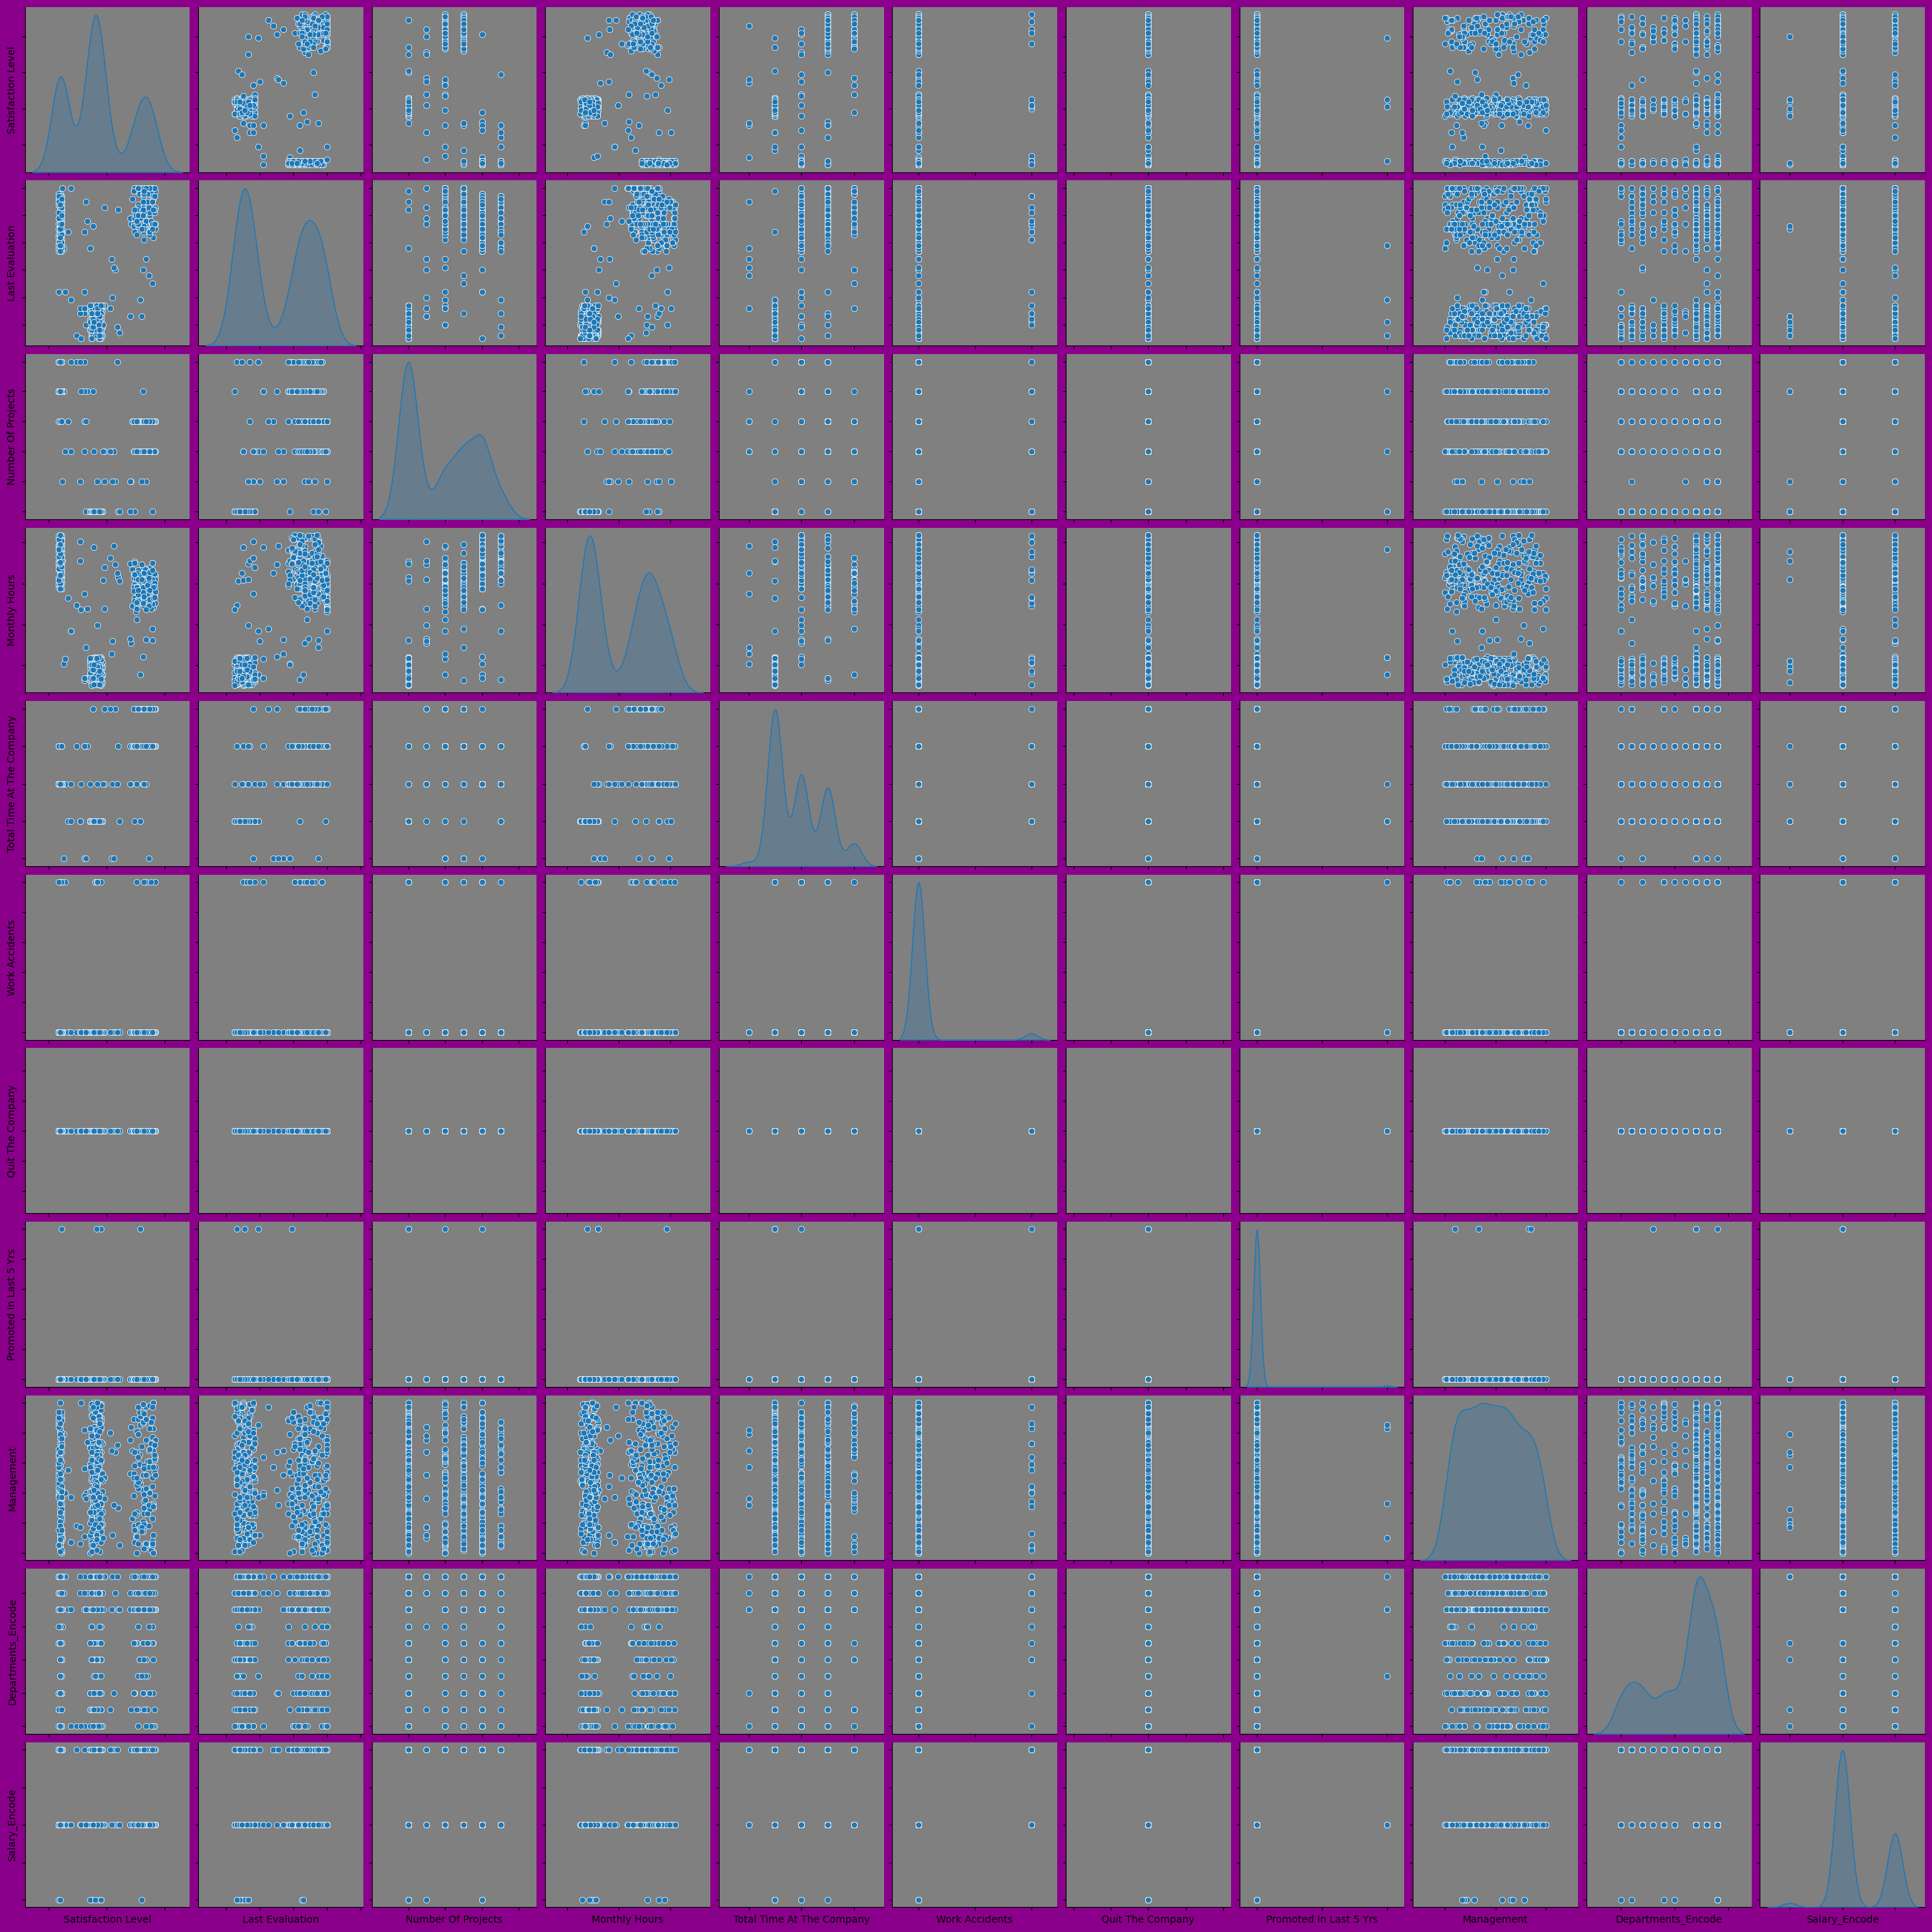

In [141]:
import warnings
warnings.filterwarnings("ignore")
mpl.rcParams['figure.facecolor'] = "darkmagenta"
mpl.rcParams['axes.facecolor'] = "gray"

sns.pairplot(hr_data[0:500], kind="scatter", markers="o", diag_kind="kde", palette="tab10");

<Axes: >

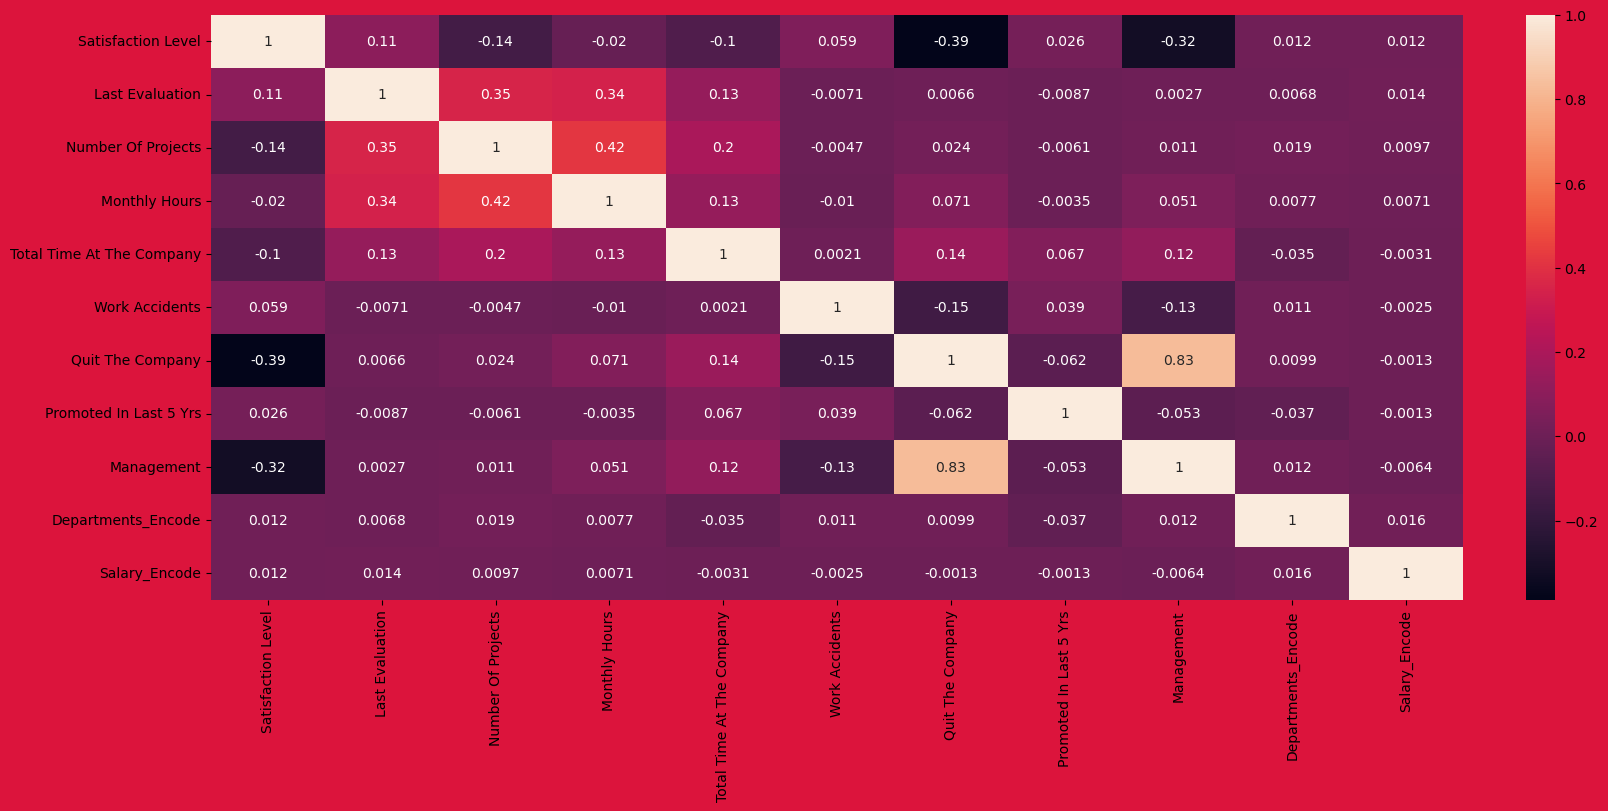

In [142]:
mpl.rcParams['figure.facecolor'] = "crimson"
mpl.rcParams['ytick.labelleft'] = True;
mpl.rcParams['xtick.labelbottom'] = True;
plt.figure(figsize=(16,8), constrained_layout=True, dpi=100)
sns.heatmap(hr_data.corr(), annot=True)

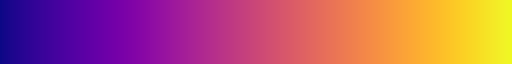

In [157]:
plt.get_cmap("plasma")

Text(0.5, 1.0, 'Departments')

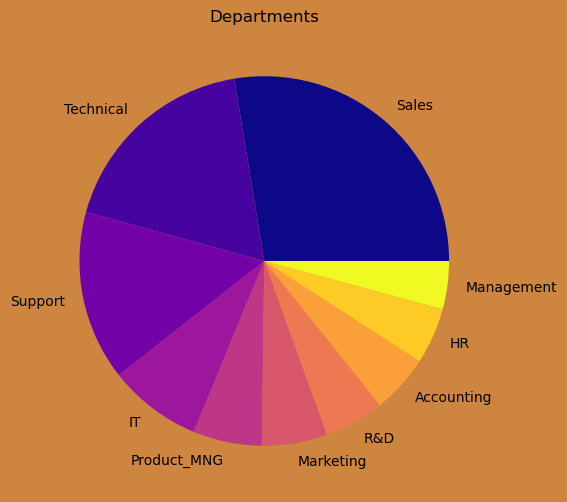

In [158]:
mpl.rcParams['figure.facecolor'] = "peru"
hr_data['Departments '] = [s.title() for s in hr_data['Departments ']]
hr_data['Departments '] = hr_data['Departments '].replace(["Hr","and", "It","Mng", "R&d"], ["HR","&","IT","MNG","R&D"], regex=True, inplace=False)
hr_data['Departments '].value_counts(["Quit the Company"]).plot(kind='pie', figsize=(20,6), cmap="plasma")
plt.axis("off")
plt.title("Departments")

In [144]:
hr_data.columns

Index(['Satisfaction Level', 'Last Evaluation', 'Number Of Projects',
       'Monthly Hours', 'Total Time At The Company', 'Work Accidents',
       'Quit The Company', 'Promoted In Last 5 Yrs', 'Departments ', 'Salary',
       'Management', 'Departments_Encode', 'Salary_Encode'],
      dtype='object')

In [145]:
y = hr_data["Quit The Company"]
features = ['Satisfaction Level', 'Last Evaluation', 'Number Of Projects',
       'Monthly Hours', 'Total Time At The Company', 'Work Accidents',
       'Promoted In Last 5 Yrs', 'Management', 
       'Departments_Encode', 'Salary_Encode']
X = hr_data[features]

In [146]:
scale = StandardScaler()
X = scale.fit_transform(X)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## <span style="padding-left: 750px; text-decoration: underline overline; text-decoration-style: dashed; text-decoration-color: #732626;  color: #000080;">Logistic Regression</span>
<span style="display: flex; justify-content: center;">![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)</span>

In [148]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
param_grid = {"penalty" : ["l1", "l2", "elasticnet"], "random_state" : [0,42], "solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"],
"max_iter" : [100, 150, 200, 250]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="neg_mean_squared_log_error")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

log = LogisticRegression(max_iter=100, penalty='l1', random_state=0, solver='liblinear')
log.fit(X_train, y_train)
y_predict = log.predict(X)
y_prob = log.predict_proba(X)[:,1]


{'max_iter': 100, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}


In [149]:
hr_data["Predictions"] = y_predict
hr_data["Probabilities"] = y_prob


In [150]:
log_coef = log.coef_
log_intercept = log.intercept_
print("Logisitic Coefficent: ", log_coef)
print("Logisitic Intercept: ", log_intercept)

Logisitic Coefficent:  [[-8.61847266e-01  5.06327132e-02 -2.28362640e-01  1.51874911e-01
   1.42547366e-01 -2.78061530e-01 -3.47053722e-01  7.29419939e+01
   4.92472004e-02  7.02951312e-02]]
Logisitic Intercept:  [28.56368612]


In [151]:
print("Mean Absolute Error: ", mean_absolute_error(y, y_predict))
print("Mean Squared Error: ", mean_squared_error(y, y_predict))

Mean Absolute Error:  0.0054003600240016
Mean Squared Error:  0.0054003600240016


In [152]:
hr_data.head(5)

,Satisfaction Level,Last Evaluation,Number Of Projects,Monthly Hours,Total Time At The Company,Work Accidents,Quit The Company,Promoted In Last 5 Yrs,Departments,Salary,Management,Departments_Encode,Salary_Encode,Predictions,Probabilities
0,0.38,0.53,2,157,3,0,1,0,Sales,Low,31,7,1,1,1.0
1,0.80,0.86,5,262,6,0,1,0,Sales,Medium,71,7,2,1,1.0
2,0.11,0.88,7,272,4,0,1,0,Sales,Medium,8,7,2,1,1.0
3,0.72,0.87,5,223,5,0,1,0,Sales,Low,68,7,1,1,1.0
4,0.37,0.52,2,159,3,0,1,0,Sales,Low,48,7,1,1,1.0


## <span style="padding-left: 350px; text-decoration: underline overline; text-decoration-style: wavy; text-decoration-color: #732626; color: #000080;">Making Art with Science
<span style="display: flex; justify-content: center;">![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)</span>

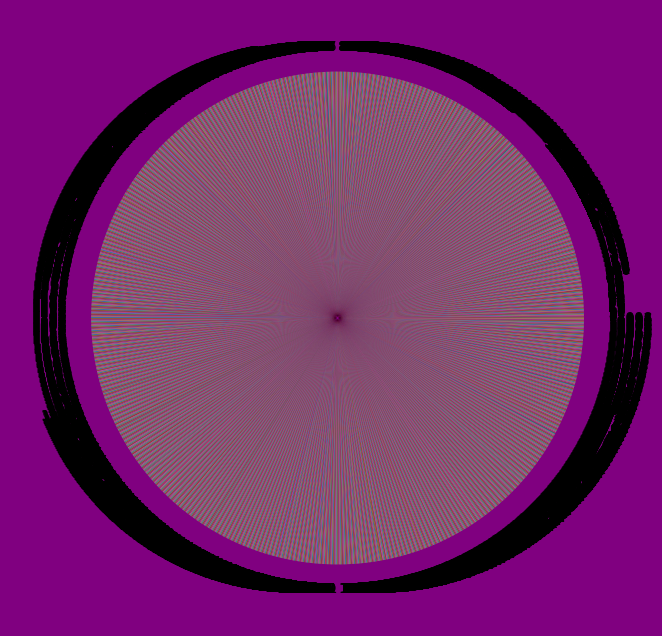

In [153]:
# Making Art with Science
mpl.rcParams['figure.facecolor'] = "purple"
hr_data["Predictions"].plot.pie(figsize=(16,8), ylabel=" ");

<Axes: >

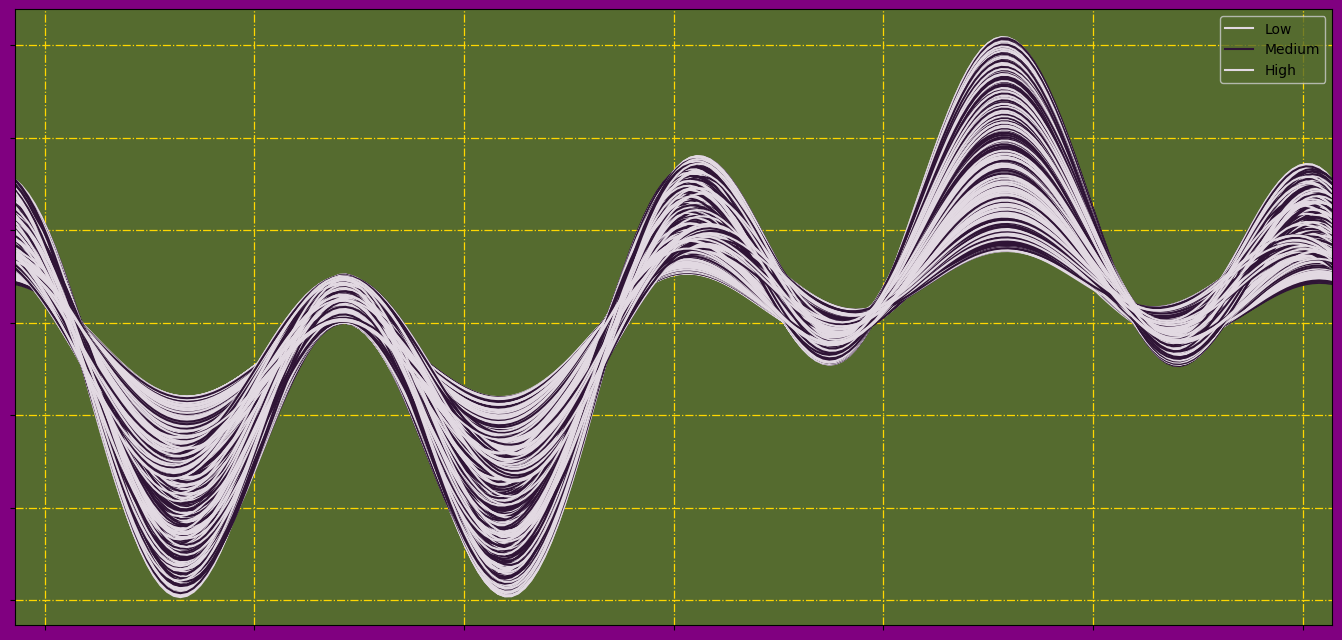

In [154]:
mpl.rcParams['figure.figsize'] = (17,8)
mpl.rcParams['axes.facecolor'] = "darkolivegreen"
mpl.rcParams['xtick.labelbottom'] = False
mpl.rcParams['ytick.labelleft'] = False
mpl.rcParams['grid.linestyle'] = "-."
mpl.rcParams['grid.color'] = "gold"
mpl.rcParams['grid.linewidth'] = 0.91


andrews_data = hr_data[['Number Of Projects',
       'Monthly Hours', 'Total Time At The Company', 'Work Accidents',
       'Promoted In Last 5 Yrs', 'Management', 
       'Departments_Encode', 'Salary_Encode', 'Salary']]
pd.plotting.andrews_curves(andrews_data, class_column="Salary", colormap="twilight")

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

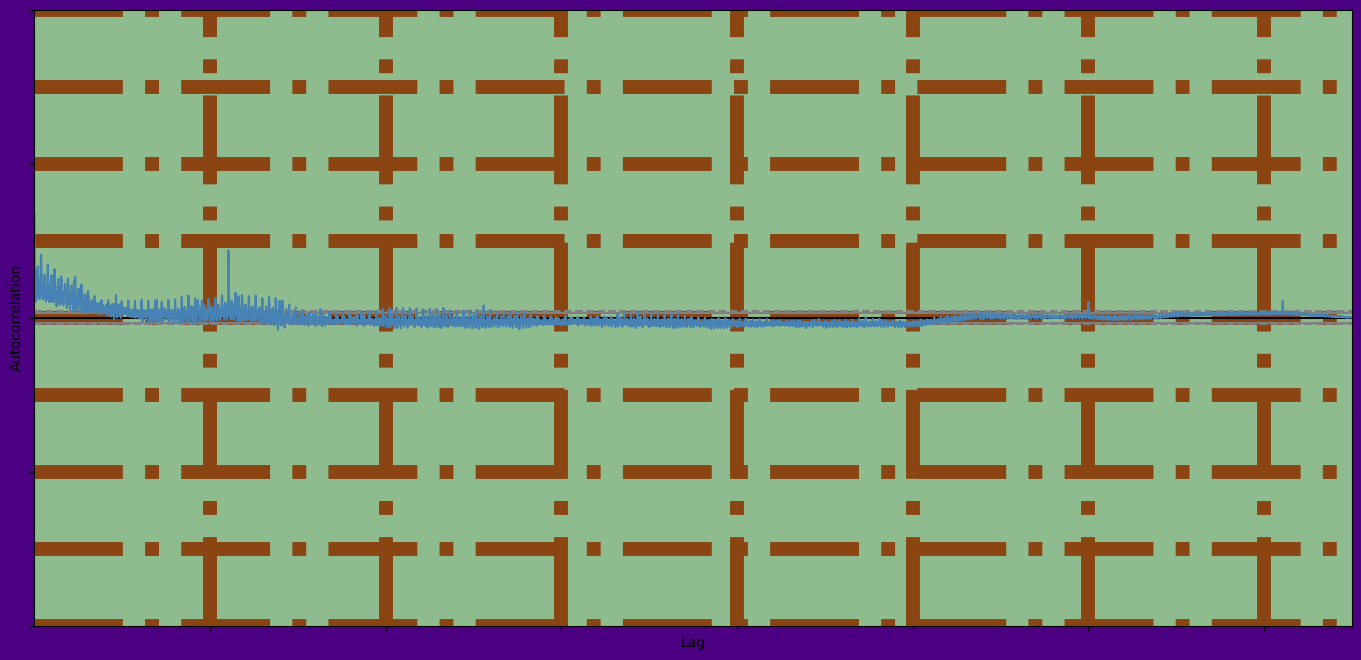

In [155]:
mpl.rcParams['figure.facecolor'] = "indigo"
mpl.rcParams['axes.facecolor'] = "darkseagreen"
mpl.rcParams['grid.color'] = "saddlebrown"
mpl.rcParams['grid.linewidth'] = 10


pd.plotting.autocorrelation_plot(X, color="steelblue")

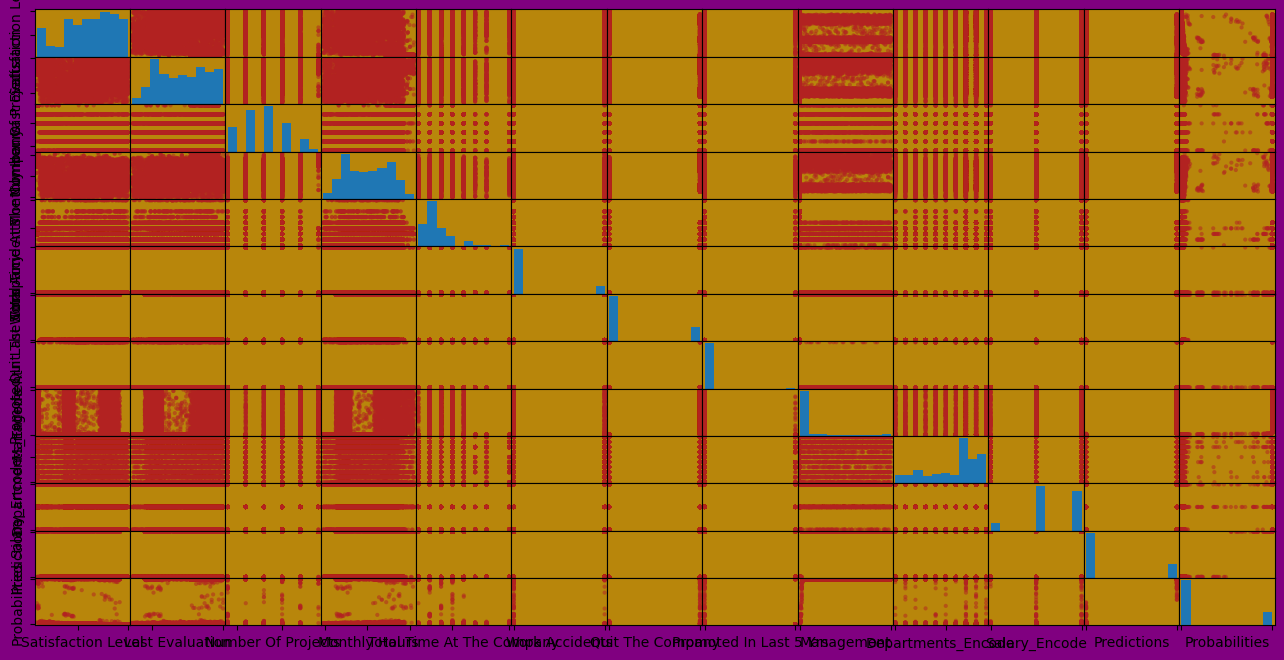

In [156]:
from cycler import cycler
mpl.rcParams['figure.facecolor'] = "purple";
# mpl.rcParams['axes.spines.left'] = False;
mpl.rcParams['xtick.labelbottom'] = False
mpl.rcParams['axes.facecolor'] = "darkgoldenrod";
mpl.rcParams['axes.grid'] = False;



pd.plotting.scatter_matrix(hr_data, figsize=(16,8), ax=None, color="firebrick");


## Machine Learning with Power BI

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# filepath = "C:/Users/Owner/source/vsc_repo/machine_learn_cookbook/Logistic_Regression_Quit-Predict/hr_file.csv"
# dataset = pd.read_csv(filepath, delimiter=",", header=0, engine="python", encoding="utf-8", on_bad_lines="warn")
dataset.rename(str.title, axis='columns', inplace=True)
dataset['Departments '] = [s.title() for s in dataset['Departments ']]
dataset['Salary'] = [s.title() for s in dataset['Salary']]
dataset['Departments '] = dataset['Departments '].replace(["Hr","and", "It","Mng", "R&d"], ["HR","&","IT","MNG","R&D"], regex=True, inplace=False)

le = LabelEncoder()
dataset["Departments_Encode"] = le.fit_transform(dataset["Departments "])
dataset["Salary_Encode"] = le.fit_transform(dataset["Salary"])

y = dataset["Quit The Company"]
features = ['Satisfaction Level', 'Last Evaluation', 'Number Of Projects',
       'Monthly Hours', 'Total Time At The Company', 'Work Accidents',
       'Promoted In Last 5 Yrs', 'Management', 
       'Departments_Encode', 'Salary_Encode']
X = dataset[features]

scale = StandardScaler()
X = scale.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
                                                    
log = LogisticRegression(max_iter=100, penalty='l1', random_state=0, solver='liblinear')
log.fit(X_train, y_train)
y_predict = log.predict(X)
y_prob = log.predict_proba(X)[:,1]

dataset["Predictions"] = y_predict
dataset["Probabilities"] = y_prob
